### Bike Sharing Model

## Problem Statement:

We have been given a Bike sharing company called Boom bikes that rents bike to people to travel from one dock to another dock.
The company has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
BoomBikes aspires to understand the demand for shared bikes among the people.
 The company wants to know:
1.Which variables are significant in predicting the demand for shared bikes.
2.How well those variables describe the bike demands

So we are required to model the demand for shared bikes with the available independent variables. 

## Reading and Understanding data

In [221]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [131]:
#Importing the data set
bsData = pd.read_csv('C:\\Users\\HP\\Desktop\\python\\BikeSharingAssignment\\day.csv')

In [132]:
#Seeing the first few rows of the data set using head()
bsData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
#dimensions of the data frame
bsData.shape
#info of the dataframe
bsData.info()
#By looking at the data set , data looks clean 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [134]:
bsData.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [102]:
#Checking missing values
bsData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data Analysis & Visualization

In [135]:
#Mapping variables season, mnth, weathersit, weekday to numerical values
bsData['weekday']=bsData.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [136]:
bsData['season']=bsData.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

In [137]:
bsData['mnth']=bsData.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [138]:
bsData['weathersit']=bsData.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})

In [139]:
bsData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Figure size 1600x1000 with 0 Axes>

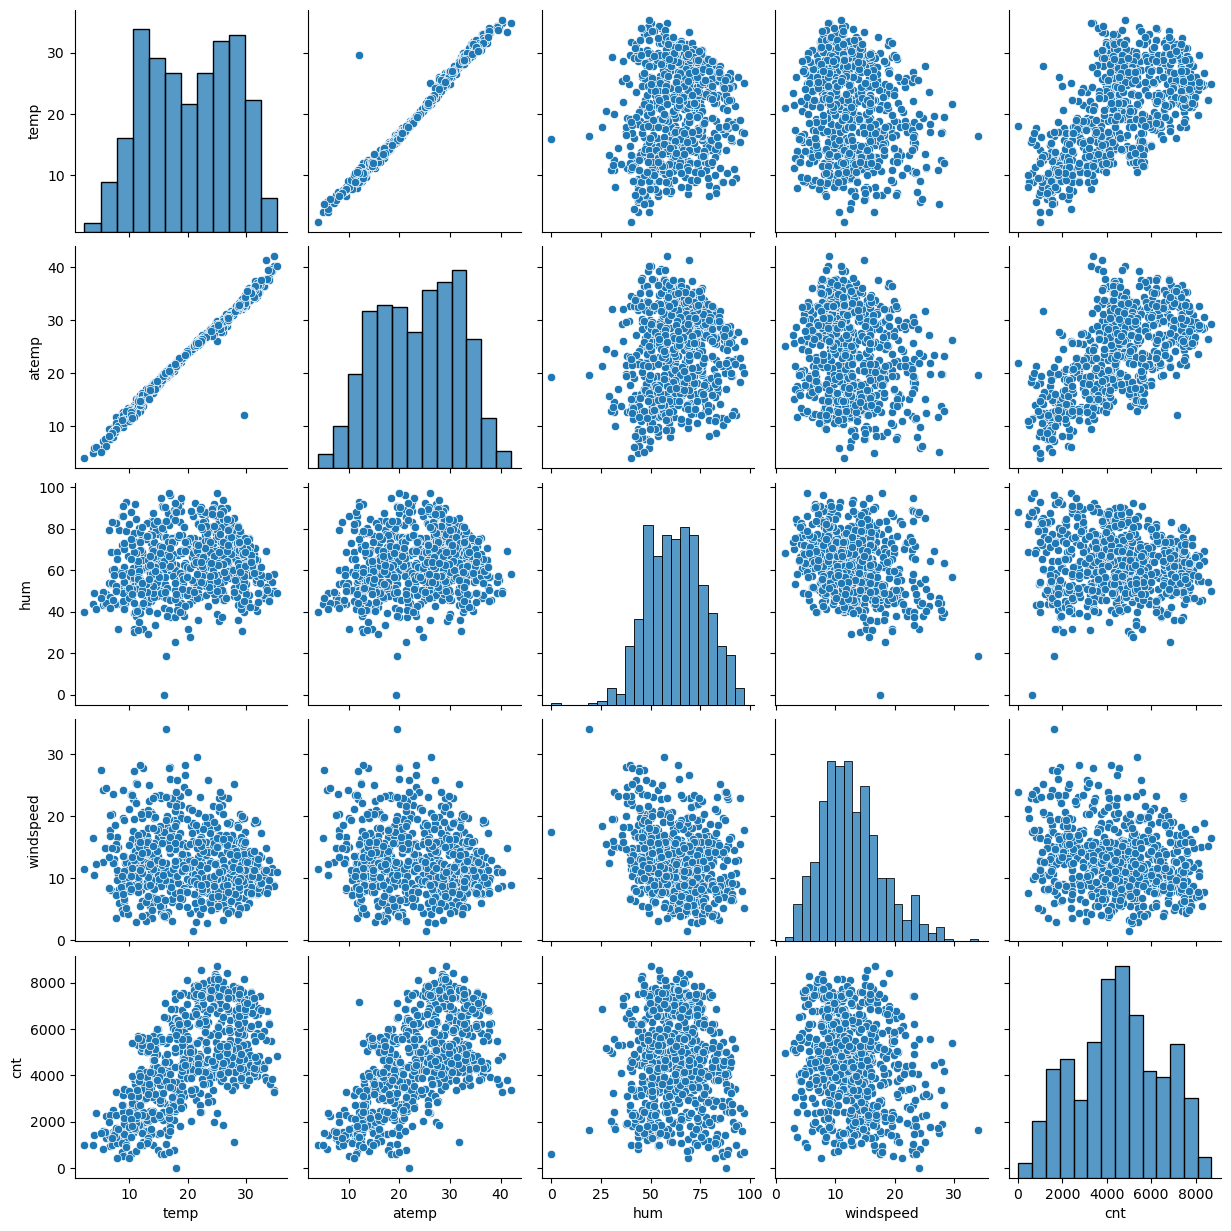

In [108]:
# Visualise correlations among these numerical variables by plotting  scatter plots

plt.figure(figsize=(16,10))
sns.pairplot(bsData[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

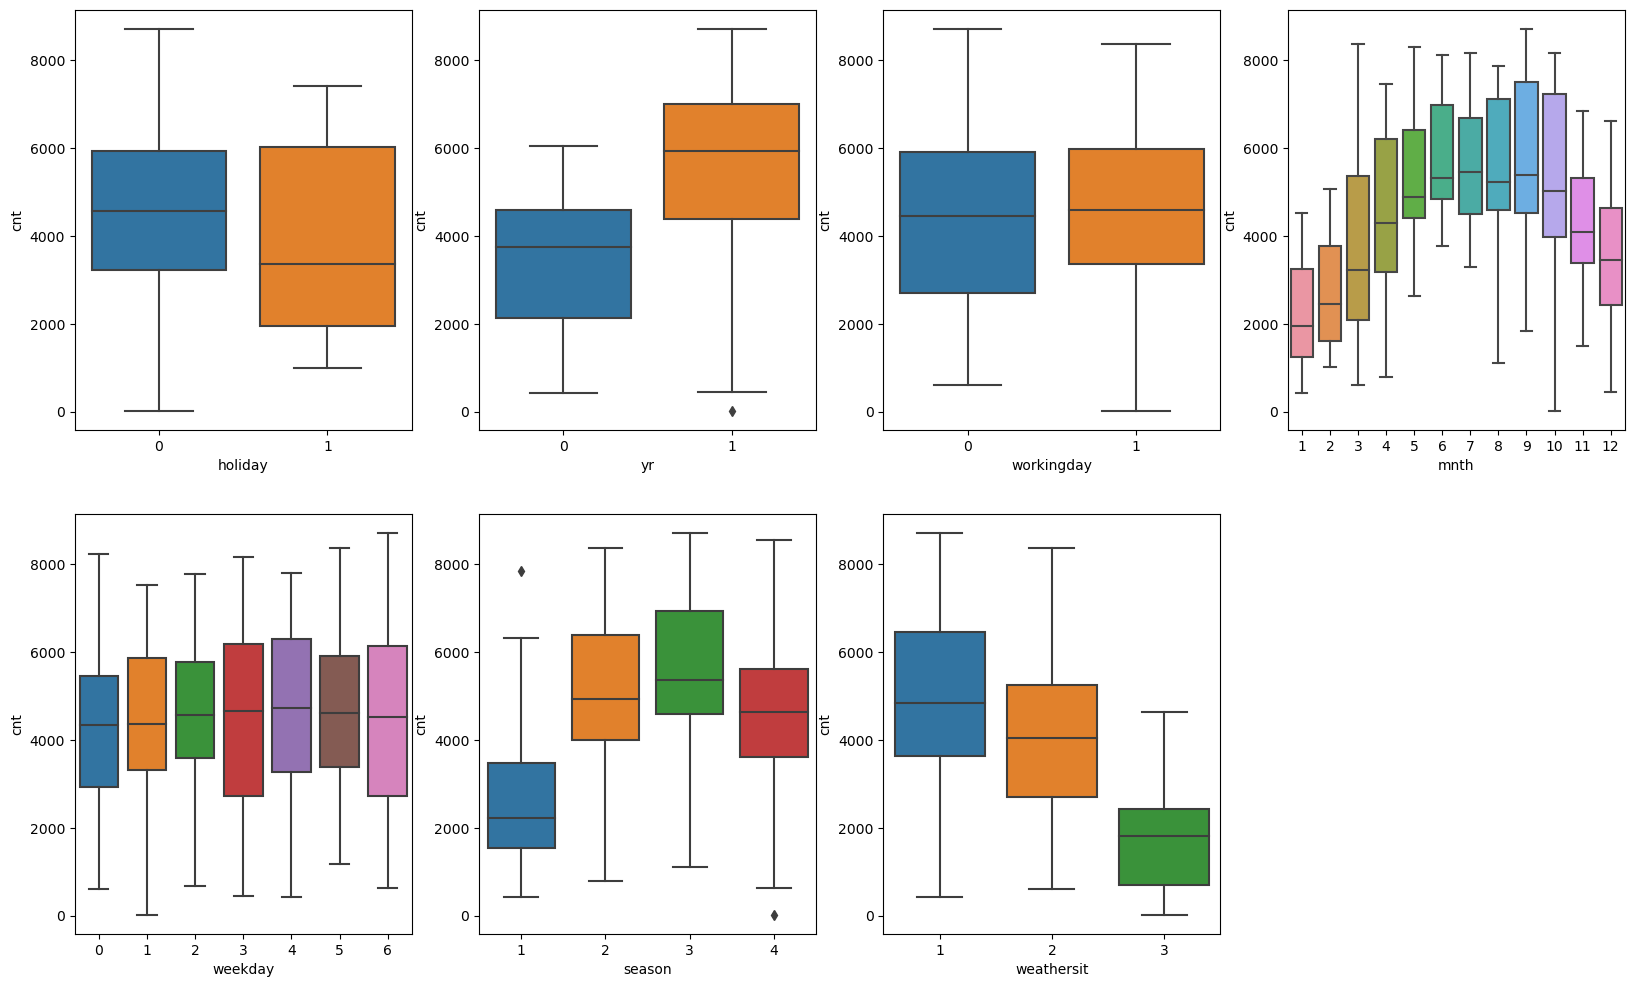

In [13]:
#Analysing the relationship between categorical variables and the count(continuous variable) using box plot
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bsData)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bsData)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bsData)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bsData)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bsData)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bsData)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bsData)
plt.show()

### Analysing the above boxplots we can infer below points:
1.Bike rentals count is more on weathersit value=1 i.e:  Clear, Few clouds, Partly cloudy, Partly cloudy
2.Bike rentals count is more on season value=3 i.e fall season
3.Bike rentals count is more on weekday values=3(Wednesday),4(Thursday),6(Saturday)
4.Bike rentals count is more in the year 2019

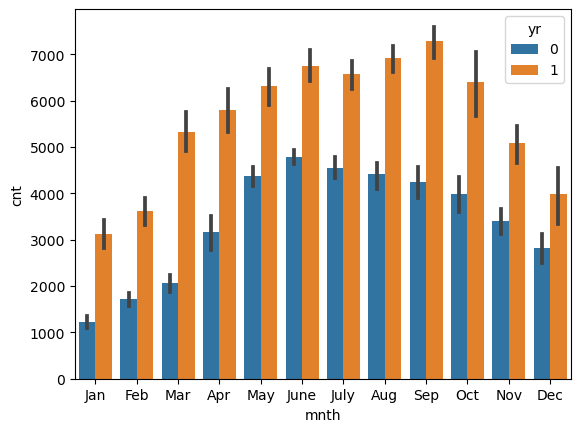

In [81]:
#Doing barplot
sns.barplot(data=bsData,x='mnth',y='cnt',hue='yr')
plt.show()
#As for yr=1 i.e 2019 more bikes are rented compare to 2018

C:\Users\HP\AppData\Local\Temp\ipykernel_9820\1606641808.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bsData.corr(), annot = True,cmap='RdYlGn')


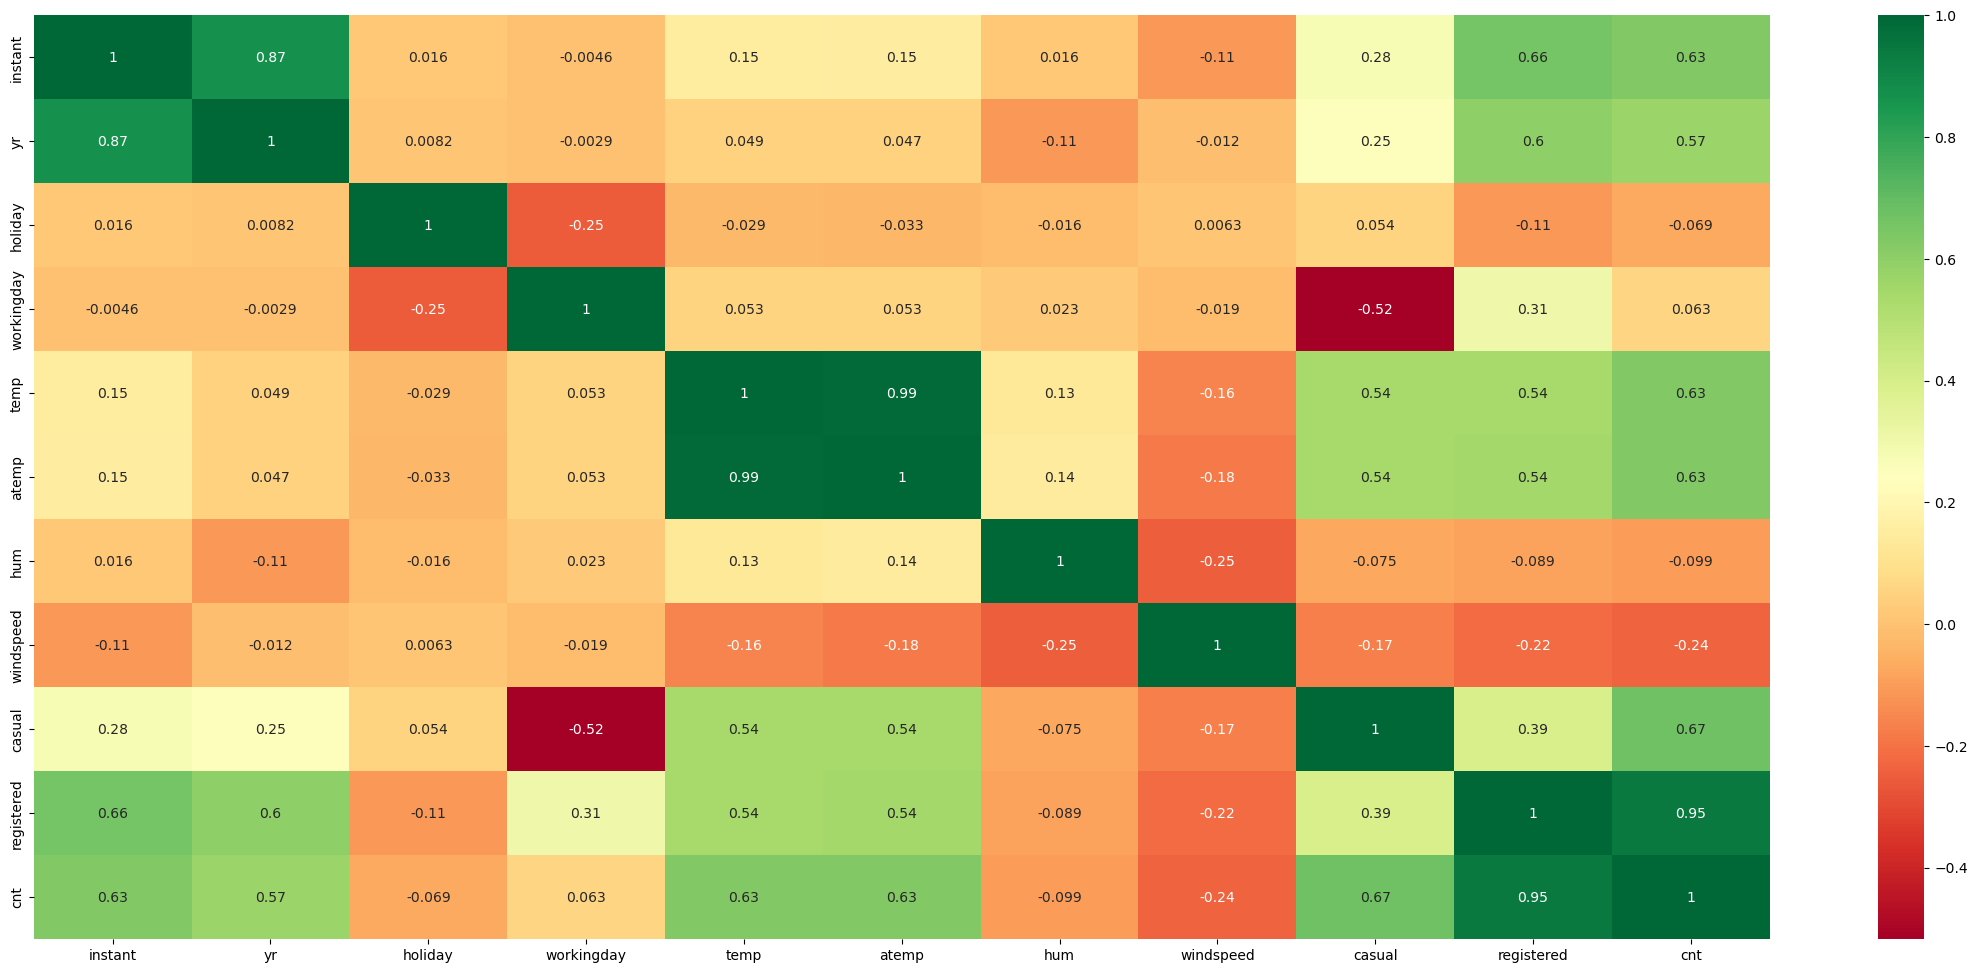

In [18]:
#HeatMap
plt.figure(figsize=(28, 12))
sns.heatmap(bsData.corr(), annot = True,cmap='RdYlGn')
plt.show()


In [ ]:
#From heatMap we can see temp=63%, atemp=63%, casual=67%,registered=95% and casual=67% variables
#are correlated to count 

## Data Preparation

In [140]:
#List all the columns
bsData.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [141]:
#Dropping the instant column as its index only
bsData=bsData.drop(['instant'],axis=1)

In [142]:
bsData.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [143]:
#Similarly dropping other ir-relevant columns
bsData = bsData.drop(['dteday','casual', 'registered','atemp'],axis=1)
bsData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [144]:
bsData.rename(columns = {'mnth':'month'}, inplace = True)

In [145]:
bsData.rename(columns = {'yr':'year'}, inplace = True)

In [146]:
bsData.rename(columns = {'hum':'humidity'}, inplace=True)

In [147]:
bsData.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Creating dummies column for categorical data

In [148]:
monthsDum = pd.get_dummies(bsData['month'],drop_first=True)
monthsDum

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [149]:
#Dummy variable for weekday
weekDum = pd.get_dummies(bsData['weekday'],drop_first=True)
weekDum

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [150]:
weathersitDum = pd.get_dummies(bsData['weathersit'],drop_first=True)
weathersitDum

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [151]:
seasonDum = pd.get_dummies(bsData['season'],drop_first=True)
seasonDum

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [152]:
#seasonDum weathersitDum weekDum monthsDum to be added to main dataframe
bsData = pd.concat([bsData,seasonDum],axis=1)

In [153]:
bsData = pd.concat([bsData,weathersitDum],axis=1)

In [154]:
bsData = pd.concat([bsData,weekDum],axis=1)

In [155]:
bsData = pd.concat([bsData,monthsDum],axis=1)

In [156]:
bsData.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist + Cloudy', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [127]:
monthsDum

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [157]:
#Dropping the season,weathersit , weekday and month column from main dataframe as we have dummies added 
bsData= bsData.drop(['season', 'month', 'weekday', 'weathersit'],axis=1)
bsData.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#  Splitting the Data into Training and Testing Sets

In [158]:
#Splitting the training and testing data as 70-30 ratio
df_train, df_test = train_test_split(bsData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [159]:
df_train.head()
df_train.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   humidity       510 non-null    float64
 5   windspeed      510 non-null    float64
 6   cnt            510 non-null    int64  
 7   spring         510 non-null    uint8  
 8   summer         510 non-null    uint8  
 9   winter         510 non-null    uint8  
 10  Light Snow     510 non-null    uint8  
 11  Mist + Cloudy  510 non-null    uint8  
 12  Mon            510 non-null    uint8  
 13  Sat            510 non-null    uint8  
 14  Sun            510 non-null    uint8  
 15  Thu            510 non-null    uint8  
 16  Tue            510 non-null    uint8  
 17  Wed            510 non-null    uint8  
 18  Aug      

In [160]:
df_test.head()
df_test.shape
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   humidity       219 non-null    float64
 5   windspeed      219 non-null    float64
 6   cnt            219 non-null    int64  
 7   spring         219 non-null    uint8  
 8   summer         219 non-null    uint8  
 9   winter         219 non-null    uint8  
 10  Light Snow     219 non-null    uint8  
 11  Mist + Cloudy  219 non-null    uint8  
 12  Mon            219 non-null    uint8  
 13  Sat            219 non-null    uint8  
 14  Sun            219 non-null    uint8  
 15  Thu            219 non-null    uint8  
 16  Tue            219 non-null    uint8  
 17  Wed            219 non-null    uint8  
 18  Aug      

# Rescaling the Features

In [50]:
bsData.head()
#Rescaling is needed for temp,humidity,windspeed,count
#We can use MinMax scaler for this

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [161]:
# Scale the data using MinMax scaling
varList = ['temp', 'humidity', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[varList] = scaler.fit_transform(df_train[varList])
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df_train.describe()
#We can see here all the max value are 1 so all numerical values are scaled between 0 to 1

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


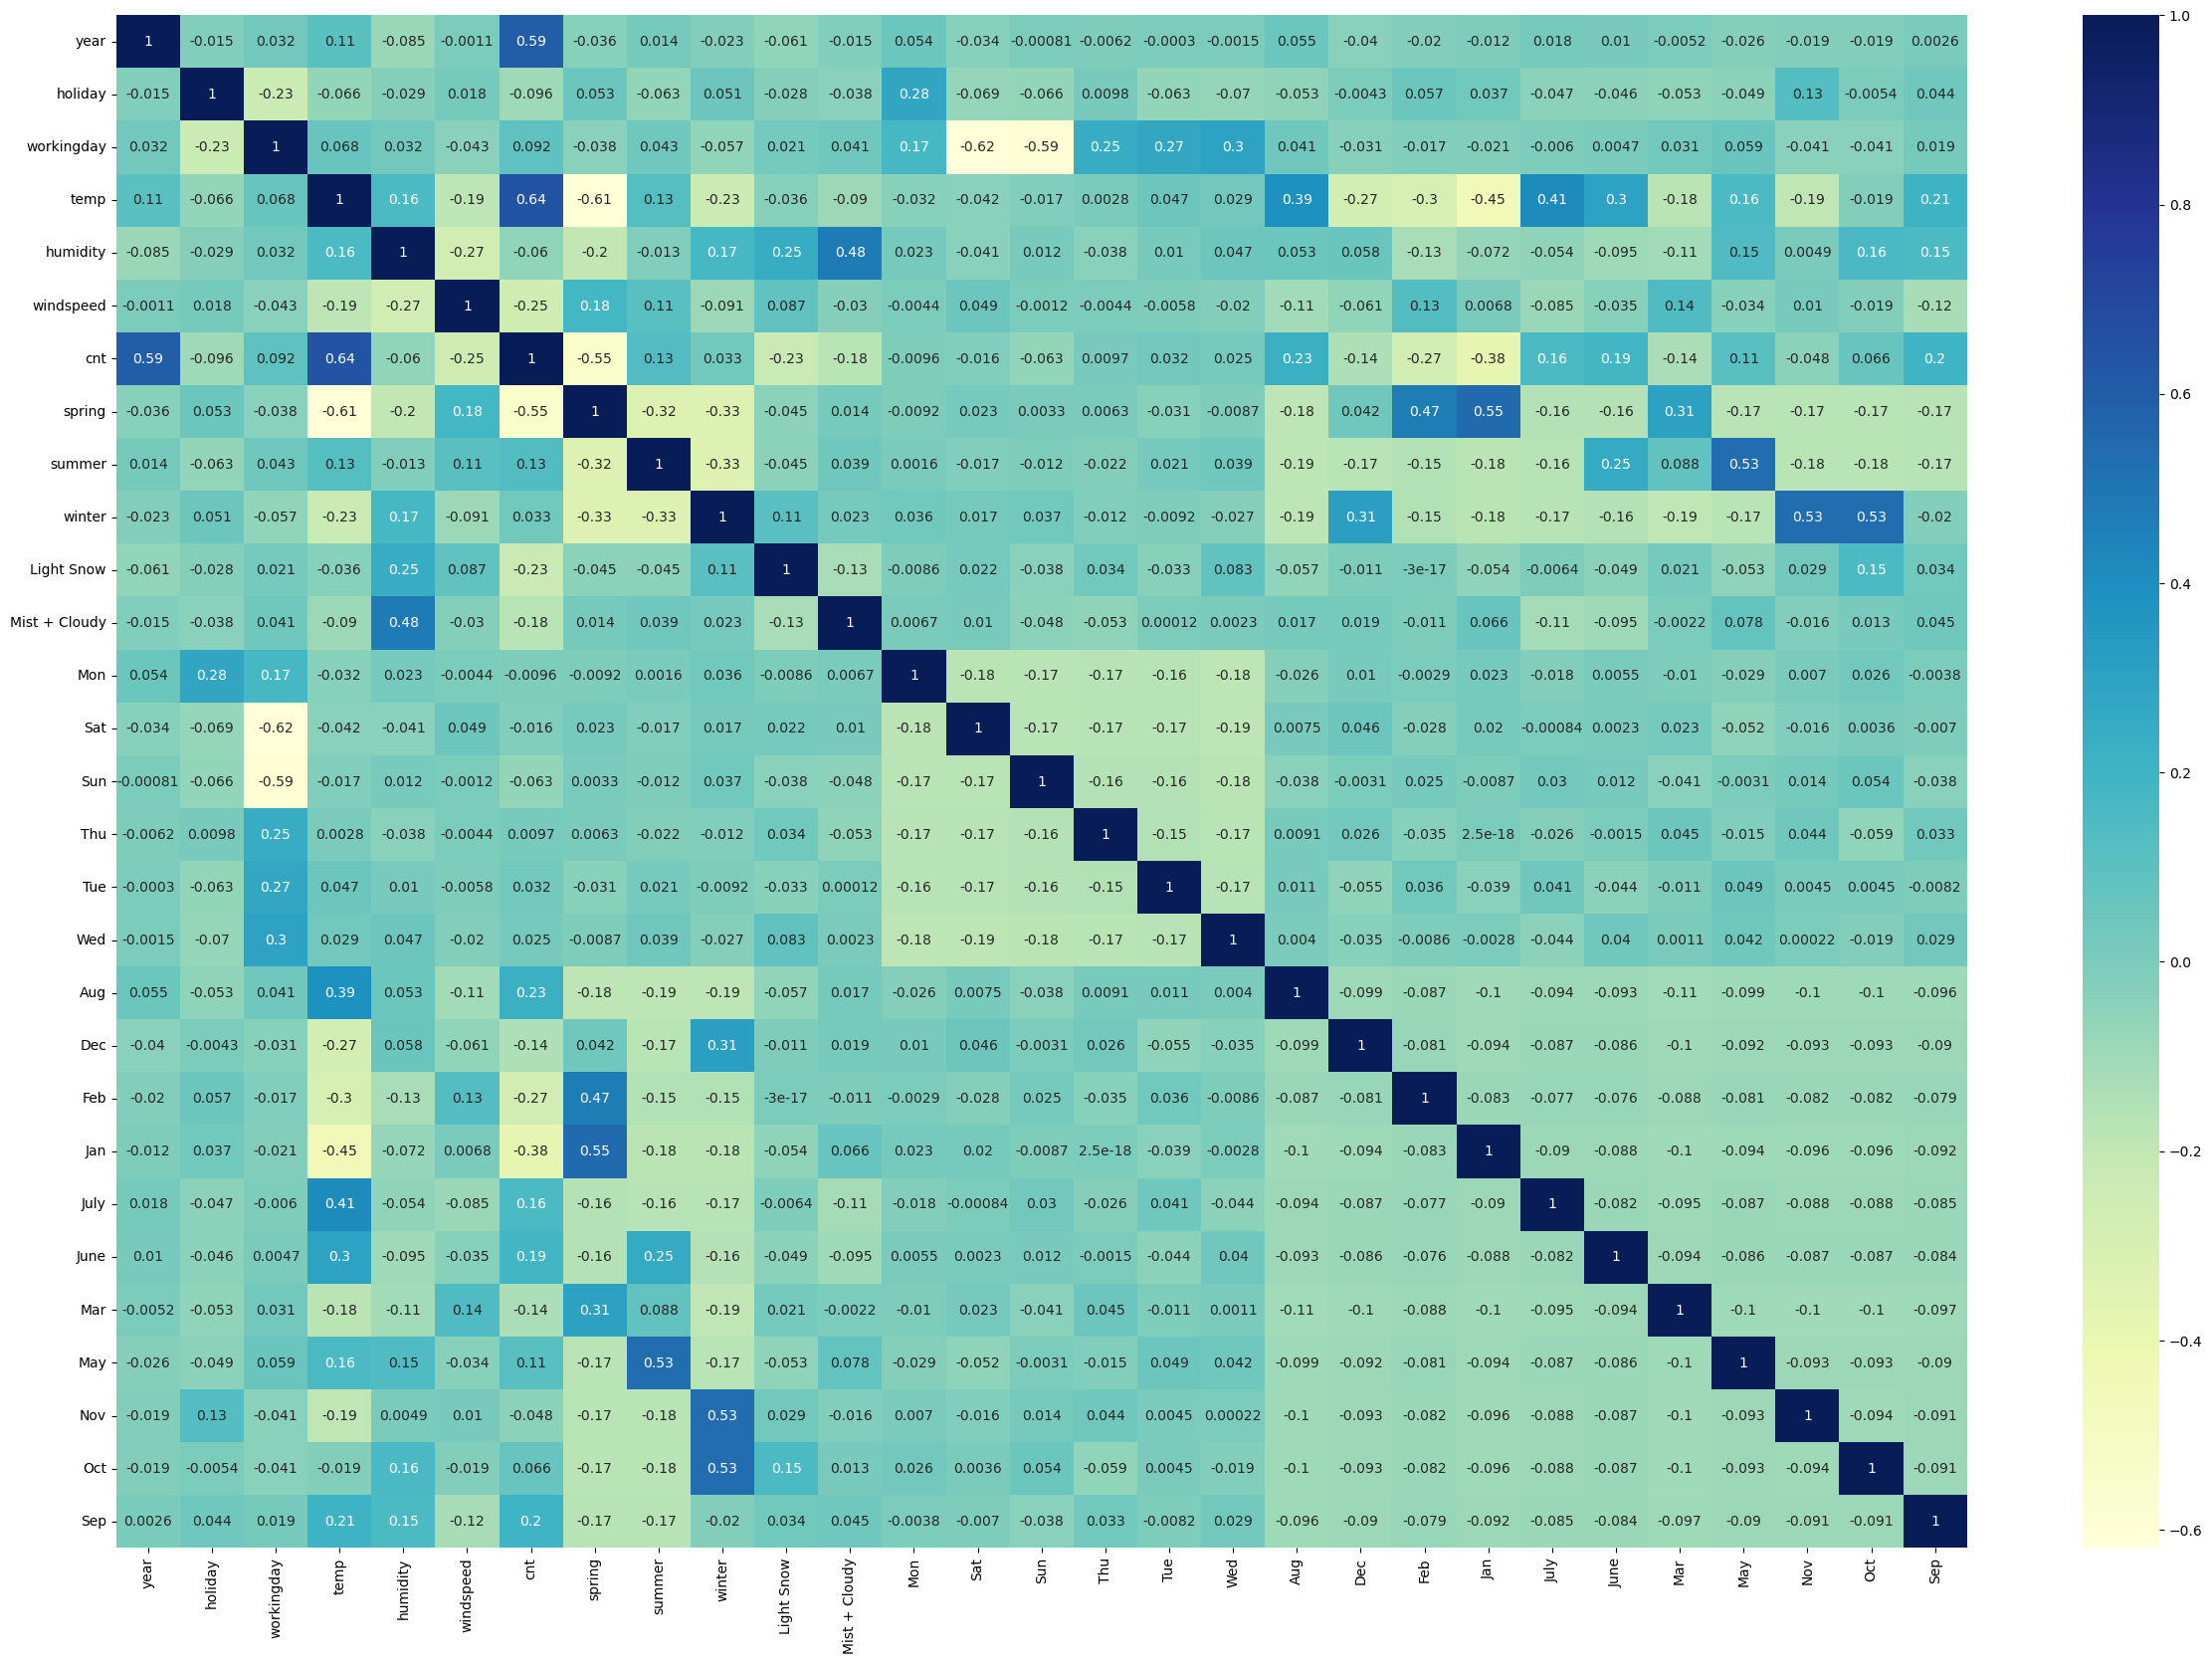

In [163]:
# Checking the correlation coefficients to see which variables are highly correlated using heatMap

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

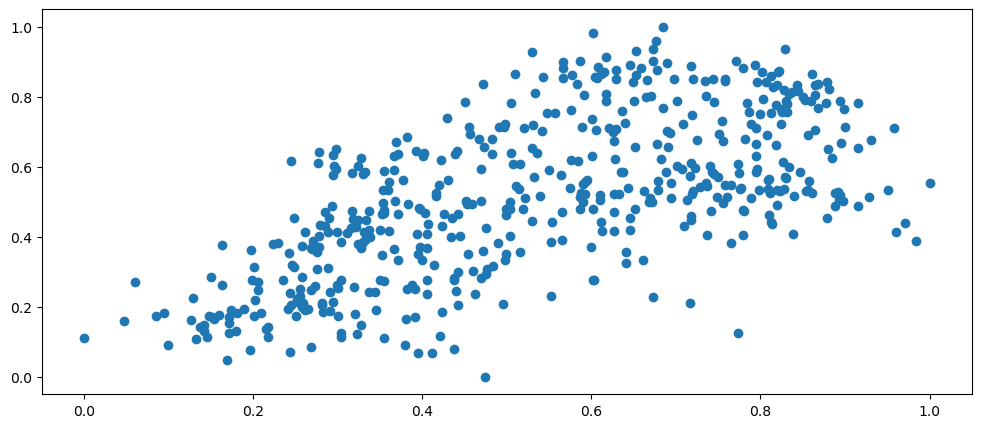

In [165]:
#Looking at the above heatMap, we can conclude that count is highly corelated to Year,temp and spring
#Scatter plot for count and temp
plt.figure(figsize=(12,5))
plt.scatter(df_train.temp,df_train.cnt)

In [166]:
df_train.cnt

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

# Linear Model

### Dividing into X and Y sets for the model building

In [167]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Following top down approach

In [168]:
# Check the dimensions of training sets

print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


### Model Building

In [169]:
# Add constant
X_train_lm = sm.add_constant(X_train)

In [170]:
X_train_lm

,const,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,1,0,...,0,0,0,0,1,0,0,0,0,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,...,0,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [171]:
# Fitting the model with train data
lr_model = sm.OLS(y_train, X_train_lm).fit()


In [172]:
#Checking the params
lr_model.params

const            0.245085
year             0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
humidity        -0.151340
windspeed       -0.186453
spring          -0.048159
summer           0.038725
winter           0.105847
Light Snow      -0.257443
Mist + Cloudy   -0.061066
Mon             -0.020907
Sat              0.096389
Sun              0.041853
Thu             -0.009237
Tue             -0.018890
Wed             -0.005388
Aug              0.014404
Dec             -0.045586
Feb             -0.032282
Jan             -0.062777
July            -0.040350
June            -0.002972
Mar              0.001045
May              0.023940
Nov             -0.041851
Oct              0.007534
Sep              0.081060
dtype: float64

In [174]:
#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          8.74e-182
Time:                        12:03:46   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
year              0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
humidity         -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring           -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer            0.0387      0.026      1.478      0.140      -0.013       0.090
winter            0.1058      0.028      3.794      0.000       0.051       0.161
Light Snow       -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist + Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat               0.0964      0.014      7.029      0.000       0.069       0.123
Sun               0.0419      0.014      3.006      0.003       0.014       0.069
Thu              -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue              -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed              -0.0054      0.015     -0.362      0.718      -0.035       0.024
Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
July             -0.0404      0.035     -1.151      0.250      -0.109       0.029
June             -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
May               0.0239      0.021      1.140      0.255      -0.017       0.065
Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
Sep               0.0811      0.032      2.533      0.012       0.018       0.144
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.46e+16
================================================================

#### We can see the r-square value is 0.853, but we can check on the multicollinearity using vif values of the predictor varaible

In [179]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [180]:
vif

,Features,VIF
2,workingday,85.58
12,Sat,19.72
13,Sun,18.35
6,spring,10.79
8,winter,9.50
7,summer,8.29
3,temp,7.12
25,Nov,6.80
26,Oct,6.59
17,Aug,6.43


In [185]:
# Workingday has vif value=85.58 which is very high
#let's drop this column and rebuild the model
X_train = X_train.drop('workingday', axis=1)
X_train.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [186]:
## Build second model
X_train_lm = sm.add_constant(X_train)
lr_model2 = sm.OLS(y_train, X_train_lm).fit()


In [187]:
# Summary of 2nd model
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          8.74e-182
Time:                        12:19:58   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3420      0.044      7.767      0.000       0.255       0.428
year              0.2321      0.008     28.820      0.000       0.216       0.248
holiday          -0.0869      0.027     -3.269      0.001      -0.139      -0.035
temp              0.4506      0.046      9.734      0.000       0.360       0.542
humidity         -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring           -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer            0.0387      0.026      1.478      0.140      -0.013       0.090
winter            0.1058      0.028      3.794      0.000       0.051       0.161
Light Snow       -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist + Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat              -0.0005      0.015     -0.033      0.974      -0.030       0.029
Sun              -0.0550      0.015     -3.607      0.000      -0.085      -0.025
Thu              -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue              -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed              -0.0054      0.015     -0.362      0.718      -0.035       0.024
Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
July             -0.0404      0.035     -1.151      0.250      -0.109       0.029
June             -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
May               0.0239      0.021      1.140      0.255      -0.017       0.065
Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
Sep               0.0811      0.032      2.533      0.012       0.018       0.144
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [188]:
##Checking vif of the 2nd model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [189]:
vif

,Features,VIF
3,humidity,38.19
2,temp,37.11
5,spring,11.81
7,winter,11.77
6,summer,6.89
25,Oct,6.40
24,Nov,6.12
16,Aug,5.87
20,July,5.26
19,Jan,5.22


In [190]:
## Spring is high vif=11.81 and pvalue=0.109
## Dropping spring column and re-building the model
X_train = X_train.drop('spring', axis=1)
X_train.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

In [191]:
## Build third model
X_train_lm = sm.add_constant(X_train)
lr_model3 = sm.OLS(y_train, X_train_lm).fit()

In [192]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          2.99e-182
Time:                        12:42:47   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3127      0.040      7.789      0.000       0.234       0.392
year              0.2318      0.008     28.742      0.000       0.216       0.248
holiday          -0.0879      0.027     -3.303      0.001      -0.140      -0.036
temp              0.4598      0.046      9.993      0.000       0.369       0.550
humidity         -0.1537      0.039     -3.992      0.000      -0.229      -0.078
windspeed        -0.1897      0.026     -7.396      0.000      -0.240      -0.139
summer            0.0663      0.020      3.345      0.001       0.027       0.105
winter            0.1328      0.022      5.941      0.000       0.089       0.177
Light Snow       -0.2546      0.026     -9.677      0.000      -0.306      -0.203
Mist + Cloudy    -0.0605      0.010     -5.793      0.000      -0.081      -0.040
Mon              -0.0204      0.015     -1.332      0.183      -0.051       0.010
Sat              -0.0013      0.015     -0.090      0.928      -0.031       0.028
Sun              -0.0555      0.015     -3.630      0.000      -0.085      -0.025
Thu              -0.0089      0.016     -0.570      0.569      -0.039       0.022
Tue              -0.0189      0.016     -1.215      0.225      -0.049       0.012
Wed              -0.0058      0.015     -0.392      0.695      -0.035       0.023
Aug               0.0389      0.030      1.292      0.197      -0.020       0.098
Dec              -0.0501      0.034     -1.496      0.135      -0.116       0.016
Feb              -0.0510      0.031     -1.657      0.098      -0.112       0.009
Jan              -0.0810      0.032     -2.563      0.011      -0.143      -0.019
July             -0.0165      0.032     -0.518      0.605      -0.079       0.046
June              0.0044      0.025      0.177      0.859      -0.044       0.053
Mar              -0.0115      0.023     -0.495      0.621      -0.057       0.034
May               0.0223      0.021      1.064      0.288      -0.019       0.064
Nov              -0.0405      0.036     -1.112      0.267      -0.112       0.031
Oct               0.0076      0.036      0.213      0.831      -0.063       0.078
Sep               0.1005      0.030      3.390      0.001       0.042       0.159
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
##Checking vif of the 3nd model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [194]:
vif

,Features,VIF
2,temp,36.83
3,humidity,36.59
6,winter,8.09
24,Oct,6.24
23,Nov,5.92
15,Aug,5.20
4,windspeed,4.79
5,summer,4.74
19,July,4.73
16,Dec,4.38


In [195]:
#Oct looks high p value=0.831 and vif=6.24
#Dropping it an rebuilding model
X_train = X_train.drop('Oct', axis=1)
X_train.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Sep'],
      dtype='object')

In [196]:
## Build 4th model
X_train_lm = sm.add_constant(X_train)
lr_model4 = sm.OLS(y_train, X_train_lm).fit()

In [197]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          2.86e-183
Time:                        12:48:42   Log-Likelihood:                 526.57
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3158      0.037      8.466      0.000       0.243       0.389
year              0.2317      0.008     28.786      0.000       0.216       0.248
holiday          -0.0876      0.027     -3.299      0.001      -0.140      -0.035
temp              0.4594      0.046     10.001      0.000       0.369       0.550
humidity         -0.1527      0.038     -3.999      0.000      -0.228      -0.078
windspeed        -0.1897      0.026     -7.402      0.000      -0.240      -0.139
summer            0.0640      0.016      3.889      0.000       0.032       0.096
winter            0.1357      0.018      7.678      0.000       0.101       0.170
Light Snow       -0.2545      0.026     -9.684      0.000      -0.306      -0.203
Mist + Cloudy    -0.0606      0.010     -5.809      0.000      -0.081      -0.040
Mon              -0.0205      0.015     -1.336      0.182      -0.051       0.010
Sat              -0.0013      0.015     -0.088      0.930      -0.031       0.028
Sun              -0.0554      0.015     -3.632      0.000      -0.085      -0.025
Thu              -0.0088      0.016     -0.569      0.570      -0.039       0.022
Tue              -0.0189      0.016     -1.219      0.223      -0.049       0.012
Wed              -0.0058      0.015     -0.392      0.695      -0.035       0.023
Aug               0.0354      0.025      1.404      0.161      -0.014       0.085
Dec              -0.0558      0.020     -2.774      0.006      -0.095      -0.016
Feb              -0.0546      0.026     -2.124      0.034      -0.105      -0.004
Jan              -0.0846      0.027     -3.189      0.002      -0.137      -0.032
July             -0.0199      0.027     -0.728      0.467      -0.074       0.034
June              0.0024      0.023      0.105      0.916      -0.043       0.047
Mar              -0.0143      0.019     -0.733      0.464      -0.052       0.024
May               0.0211      0.020      1.046      0.296      -0.019       0.061
Nov              -0.0470      0.019     -2.430      0.015      -0.085      -0.009
Sep               0.0963      0.022      4.385      0.000       0.053       0.139
==============================================================================
Omnibus:                       80.949   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.579
Skew:                          -0.780   Prob(JB):                     2.08e-48
Kurtosis:                       5.811   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
##Checking vif of the 4th model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [199]:
vif

,Features,VIF
2,temp,35.82
3,humidity,33.21
4,windspeed,4.64
6,winter,4.51
15,Aug,3.93
5,summer,3.72
19,July,3.71
20,June,2.54
18,Jan,2.53
24,Sep,2.47


In [200]:
#Checking values with high p-value and low vif
#sat is one choice as p-value is 0.930
X_train = X_train.drop('Sat', axis=1)
X_train.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Sep'],
      dtype='object')

In [201]:
## Build 5th model
X_train_lm = sm.add_constant(X_train)
lr_model4 = sm.OLS(y_train, X_train_lm).fit()

In [202]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          2.63e-184
Time:                        12:53:02   Log-Likelihood:                 526.56
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3151      0.036      8.651      0.000       0.244       0.387
year              0.2317      0.008     28.816      0.000       0.216       0.248
holiday          -0.0876      0.027     -3.302      0.001      -0.140      -0.035
temp              0.4596      0.046     10.018      0.000       0.369       0.550
humidity         -0.1528      0.038     -4.005      0.000      -0.228      -0.078
windspeed        -0.1898      0.026     -7.418      0.000      -0.240      -0.140
summer            0.0639      0.016      3.892      0.000       0.032       0.096
winter            0.1356      0.018      7.687      0.000       0.101       0.170
Light Snow       -0.2546      0.026     -9.703      0.000      -0.306      -0.203
Mist + Cloudy    -0.0605      0.010     -5.817      0.000      -0.081      -0.040
Mon              -0.0198      0.013     -1.524      0.128      -0.045       0.006
Sun              -0.0547      0.013     -4.257      0.000      -0.080      -0.029
Thu              -0.0081      0.013     -0.617      0.538      -0.034       0.018
Tue              -0.0182      0.013     -1.379      0.169      -0.044       0.008
Wed              -0.0051      0.012     -0.413      0.680      -0.030       0.019
Aug               0.0353      0.025      1.403      0.161      -0.014       0.085
Dec              -0.0559      0.020     -2.778      0.006      -0.095      -0.016
Feb              -0.0546      0.026     -2.126      0.034      -0.105      -0.004
Jan              -0.0847      0.027     -3.194      0.001      -0.137      -0.033
July             -0.0200      0.027     -0.731      0.465      -0.074       0.034
June              0.0023      0.023      0.103      0.918      -0.043       0.047
Mar              -0.0143      0.019     -0.735      0.462      -0.052       0.024
May               0.0211      0.020      1.049      0.295      -0.018       0.061
Nov              -0.0470      0.019     -2.433      0.015      -0.085      -0.009
Sep               0.0962      0.022      4.389      0.000       0.053       0.139
==============================================================================
Omnibus:                       81.146   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.840
Skew:                          -0.782   Prob(JB):                     1.83e-48
Kurtosis:                       5.811   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
##vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [204]:
vif

,Features,VIF
2,temp,35.56
3,humidity,32.67
4,windspeed,4.55
6,winter,4.45
14,Aug,3.92
18,July,3.70
5,summer,3.67
19,June,2.54
23,Sep,2.46
17,Jan,2.45


In [205]:
#Checking values with high p-value and low vif
#Jun is one choice as p-value is 0.918
X_train = X_train.drop('June', axis=1)
X_train.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'Mar', 'May', 'Nov', 'Sep'],
      dtype='object')

In [206]:
## Build 6th model
X_train_lm = sm.add_constant(X_train)
lr_model4 = sm.OLS(y_train, X_train_lm).fit()

In [207]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          2.36e-185
Time:                        12:59:32   Log-Likelihood:                 526.56
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3151      0.036      8.660      0.000       0.244       0.387
year              0.2316      0.008     28.981      0.000       0.216       0.247
holiday          -0.0878      0.026     -3.328      0.001      -0.140      -0.036
temp              0.4620      0.039     11.895      0.000       0.386       0.538
humidity         -0.1533      0.038     -4.062      0.000      -0.227      -0.079
windspeed        -0.1901      0.025     -7.506      0.000      -0.240      -0.140
summer            0.0638      0.016      3.896      0.000       0.032       0.096
winter            0.1351      0.017      8.079      0.000       0.102       0.168
Light Snow       -0.2545      0.026     -9.713      0.000      -0.306      -0.203
Mist + Cloudy    -0.0605      0.010     -5.826      0.000      -0.081      -0.040
Mon              -0.0197      0.013     -1.524      0.128      -0.045       0.006
Sun              -0.0547      0.013     -4.261      0.000      -0.080      -0.029
Thu              -0.0081      0.013     -0.619      0.536      -0.034       0.018
Tue              -0.0182      0.013     -1.386      0.166      -0.044       0.008
Wed              -0.0051      0.012     -0.413      0.680      -0.029       0.019
Aug               0.0338      0.020      1.660      0.098      -0.006       0.074
Dec              -0.0558      0.020     -2.779      0.006      -0.095      -0.016
Feb              -0.0548      0.026     -2.144      0.033      -0.105      -0.005
Jan              -0.0847      0.026     -3.200      0.001      -0.137      -0.033
July             -0.0216      0.022     -0.989      0.323      -0.065       0.021
Mar              -0.0148      0.019     -0.789      0.431      -0.052       0.022
May               0.0201      0.017      1.151      0.250      -0.014       0.054
Nov              -0.0469      0.019     -2.434      0.015      -0.085      -0.009
Sep               0.0951      0.019      4.968      0.000       0.058       0.133
==============================================================================
Omnibus:                       80.950   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.549
Skew:                          -0.781   Prob(JB):                     3.49e-48
Kurtosis:                       5.801   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From models above after dropping few columns also we are getting r-squared value as 0.85 

### Residual Analysis

In [209]:
y_train_pred = lr_model4.predict(X_train_lm)

C:\Users\HP\AppData\Local\Temp\ipykernel_9820\2257099987.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Error_term, bins=20)


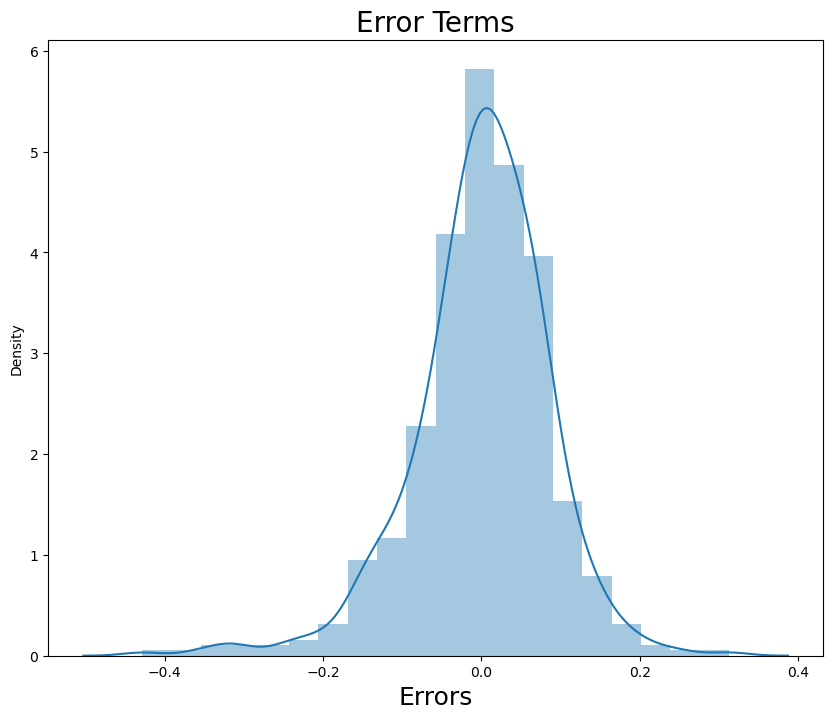

In [210]:
# Plotting histogram of error terms
plt.figure(figsize=(10,8))
Error_term = y_train - y_train_pred
sns.distplot(Error_term, bins=20)
plt.title("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=18);

###### From above histogram we can view that error terms are normally distributed and mean value is also approximately zero
###### Thus our model is good to make inferences

## Making Prediction using our model

In [211]:
# Scale the test data using MinMax scaling on same predictor set used in train data
varList = ['temp', 'humidity', 'windspeed', 'cnt']
df_test[varList] = scaler.transform(df_test[varList])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [212]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing test data to X and Y

In [213]:
y_test = df_test.pop('cnt')
X_test = df_test

In [215]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 28)


In [216]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [217]:
# Drop the variables from test data set which we dropped in training data set while building model

X_test_sm = X_test_sm.drop(['workingday', 'spring', 'Oct', 'June', 'Sat'], axis=1)

In [219]:
y_test_pred = lr_model4.predict(X_test_sm)

### Evaluating the model

In [222]:
#Calculating the r2 score value for test data
r2_score(y_test, y_test_pred)

0.8203295398802869

#### So on the training data our model gives the r-squared value as 0.85
#### And on test data the r-squared value as 0.820. So we can conclude that overall our model is good